In [1]:
%matplotlib inline

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer

import utils

sns.set_context("notebook", font_scale=1.5)
plt.rcParams['figure.figsize'] = (17, 5)

In [2]:
path = 'C:\\Users\\kancy\\Desktop\\python_test\\project\\fma_metadata\\'
tracks = utils.load(path+'tracks.csv')
genres = utils.load(path+'genres.csv')
features = utils.load(path+'features.csv')
echonest = utils.load(path+'echonest.csv')

np.testing.assert_array_equal(features.index, tracks.index)
assert echonest.index.isin(tracks.index).all()

tracks.shape, genres.shape, features.shape, echonest.shape

C:\Users\kancy\Desktop\python_test\project\fma\utils.py:213: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  'category', categories=SUBSETS, ordered=True)


((106574, 52), (163, 4), (106574, 518), (13129, 249))

In [3]:
subset = tracks['set', 'subset'] == 'small'
small_tracks = tracks[subset]
small_tracks.columns.values
#small_tracks['track', 'genre_top']


array([('album', 'comments'), ('album', 'date_created'),
       ('album', 'date_released'), ('album', 'engineer'),
       ('album', 'favorites'), ('album', 'id'), ('album', 'information'),
       ('album', 'listens'), ('album', 'producer'), ('album', 'tags'),
       ('album', 'title'), ('album', 'tracks'), ('album', 'type'),
       ('artist', 'active_year_begin'), ('artist', 'active_year_end'),
       ('artist', 'associated_labels'), ('artist', 'bio'),
       ('artist', 'comments'), ('artist', 'date_created'),
       ('artist', 'favorites'), ('artist', 'id'), ('artist', 'latitude'),
       ('artist', 'location'), ('artist', 'longitude'),
       ('artist', 'members'), ('artist', 'name'),
       ('artist', 'related_projects'), ('artist', 'tags'),
       ('artist', 'website'), ('artist', 'wikipedia_page'),
       ('set', 'split'), ('set', 'subset'), ('track', 'bit_rate'),
       ('track', 'comments'), ('track', 'composer'),
       ('track', 'date_created'), ('track', 'date_recorded'),
   

In [4]:
top_genres =small_tracks['track', 'genre_top'].unique() 
titles1 = []
titles2 = []

for g in top_genres:
    g_subset = small_tracks['track', 'genre_top'] == g
    g_tracks = small_tracks[g_subset]
    g_sample = g_tracks.sample(2)
    
    titles1.append(g_sample.index[0])
    titles2.append(g_sample.index[1])


In [5]:
import os
import librosa
import librosa.display

In [6]:
def normalize(x):
    return x/np.max(np.abs(x))

from scipy.stats.stats import pearsonr


In [7]:
audio_dir = 'C:\\Users\\kancy\\Desktop\\python_test\\project\\fma_small\\'

xsr = 44100
start, end = 5, 15
c = [[0 for x in range(len(titles1))] for y in range(len(titles2))] 
#len(titles1)

for i in range(len(titles1)):
    filename = utils.get_audio_path(audio_dir, titles1[i])
    x, xsr = librosa.load(filename, sr=xsr, mono=True)
    x = x[start*xsr:end*xsr]
    #x = normalize(x)
    for j in range(len(titles2)):
        filename = utils.get_audio_path(audio_dir, titles2[j])
        y, xsr = librosa.load(filename, sr=xsr, mono=True)
        y = y[start*xsr:end*xsr]
        #y = normalize(y)
        c[i][j]=np.max(np.abs(np.correlate(x,y)))
        #c[i][j] = np.abs(pearsonr(x,y)[0])



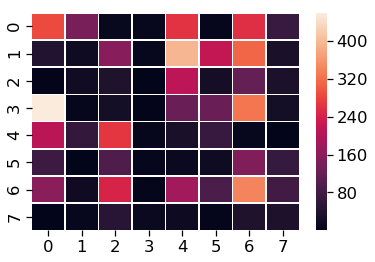

In [8]:
#plt.plot(c, '.')

ax = sns.heatmap(c, linewidth=0.5)
plt.show()

#plt.imshow(c, cmap='hot')
#plt.show()

In [9]:
filename = utils.get_audio_path(audio_dir, titles1[0])
x, sr = librosa.load(filename, sr=None, mono=True)
print('Duration: {:.2f}s, {} samples'.format(x.shape[-1] / sr, x.size))

start, end = 7, 17
ipd.Audio(data=x[start*sr:end*sr], rate=sr)

Duration: 29.98s, 1321967 samples


In [10]:
filename = utils.get_audio_path(audio_dir, titles2[0])
x, sr = librosa.load(filename, sr=None, mono=True)
print('Duration: {:.2f}s, {} samples'.format(x.shape[-1] / sr, x.size))

start, end = 7, 17
ipd.Audio(data=x[start*sr:end*sr], rate=sr)

Duration: 29.98s, 1321967 samples


In [11]:
from scipy.stats import norm

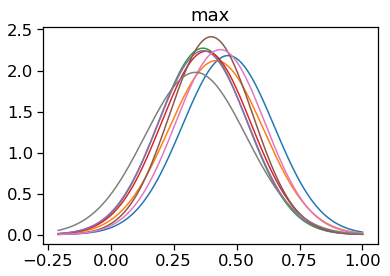

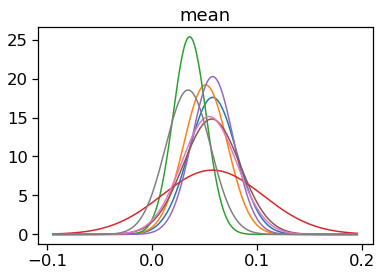

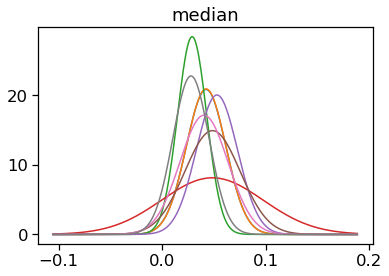

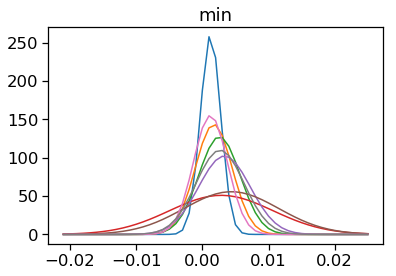

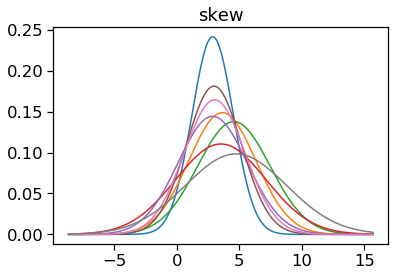

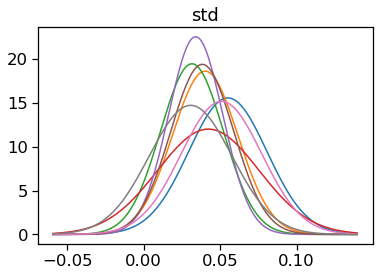

In [12]:
top_genres =small_tracks['track', 'genre_top'].unique() 

zcr_feats = ['max', 'mean', 'median', 'min', 'skew', 'std']
for f in zcr_feats:
    means = []
    std = []
    for g in top_genres:
        g_subset = small_tracks['track', 'genre_top'] == g
        g_tracks = small_tracks[g_subset]
        
        zcr = features['zcr', f, '01'][g_tracks.index.values]    
        means.append(np.mean(zcr))
        std.append(np.std(zcr))

    mean_of_means = np.mean(means)
    max_std = np.max(std)
    x_axis = np.arange(mean_of_means-max_std*3, mean_of_means+max_std*3, 0.001)
    plt.figure()
    for i in range(len(means)):
        zcr_dis= norm.pdf(x_axis,means[i],std[i])
        plt.plot(x_axis, zcr_dis)
    #plt.legend(top_genres)
    plt.title(f)

In [13]:
features.columns.values

array([('chroma_cens', 'kurtosis', '01'),
       ('chroma_cens', 'kurtosis', '02'),
       ('chroma_cens', 'kurtosis', '03'),
       ('chroma_cens', 'kurtosis', '04'),
       ('chroma_cens', 'kurtosis', '05'),
       ('chroma_cens', 'kurtosis', '06'),
       ('chroma_cens', 'kurtosis', '07'),
       ('chroma_cens', 'kurtosis', '08'),
       ('chroma_cens', 'kurtosis', '09'),
       ('chroma_cens', 'kurtosis', '10'),
       ('chroma_cens', 'kurtosis', '11'),
       ('chroma_cens', 'kurtosis', '12'), ('chroma_cens', 'max', '01'),
       ('chroma_cens', 'max', '02'), ('chroma_cens', 'max', '03'),
       ('chroma_cens', 'max', '04'), ('chroma_cens', 'max', '05'),
       ('chroma_cens', 'max', '06'), ('chroma_cens', 'max', '07'),
       ('chroma_cens', 'max', '08'), ('chroma_cens', 'max', '09'),
       ('chroma_cens', 'max', '10'), ('chroma_cens', 'max', '11'),
       ('chroma_cens', 'max', '12'), ('chroma_cens', 'mean', '01'),
       ('chroma_cens', 'mean', '02'), ('chroma_cens', 'mean', '

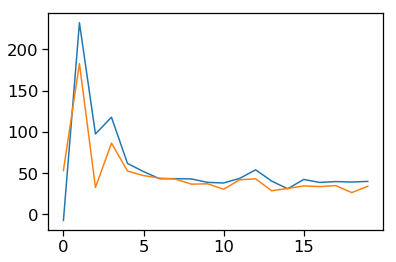

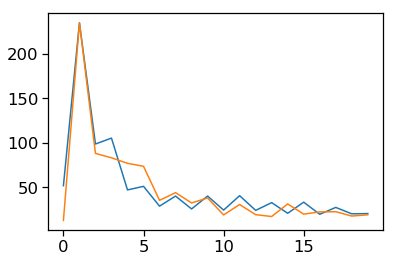

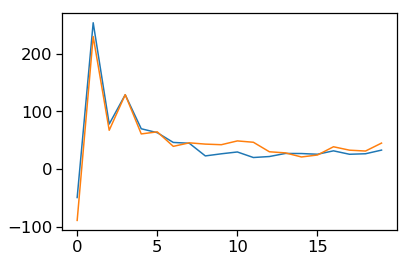

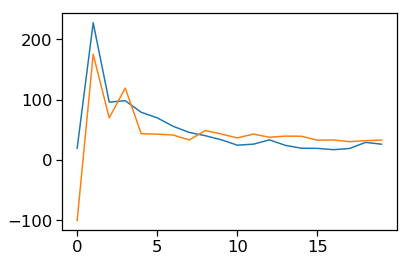

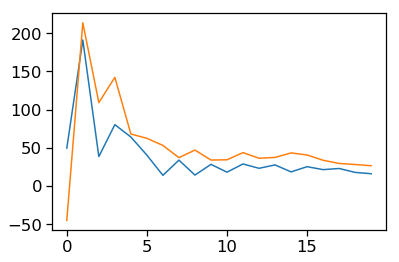

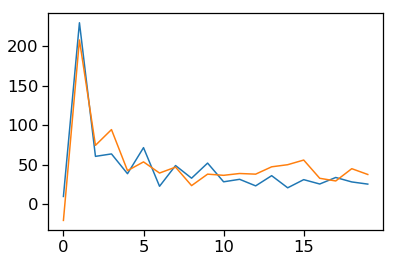

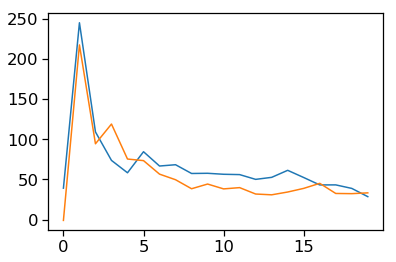

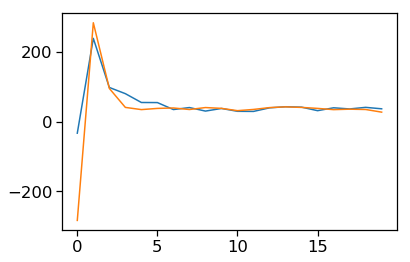

In [19]:
 for g in top_genres:
        g_subset = small_tracks['track', 'genre_top'] == g
        g_tracks = small_tracks[g_subset]
        g_sample = g_tracks.sample(2)
        
        #chroma = ['01']#,'02','03','04','05','06']
        chroma = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20']
        sb = []
        for c in chroma:
            sb.append(features['mfcc', 'max', c][g_sample.index.values].values)    
        plt.figure()
        plt.plot(sb)
        


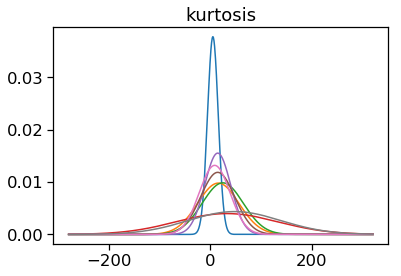

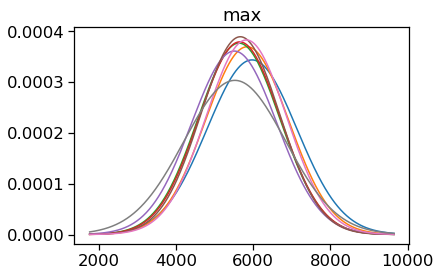

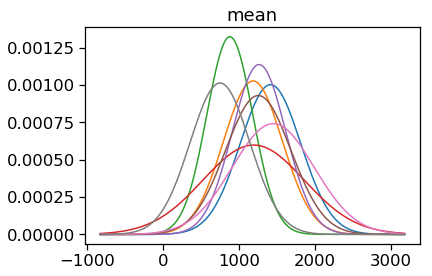

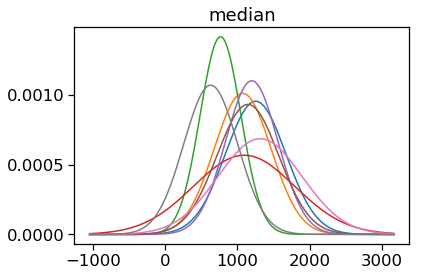

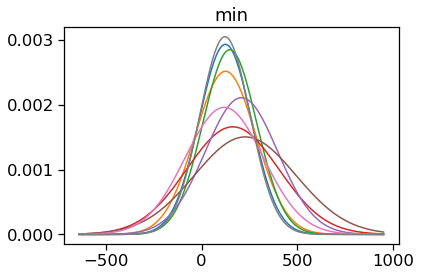

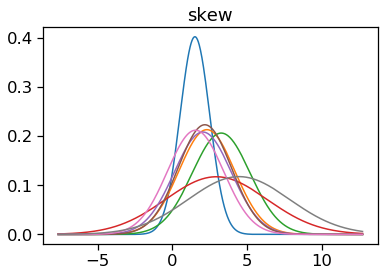

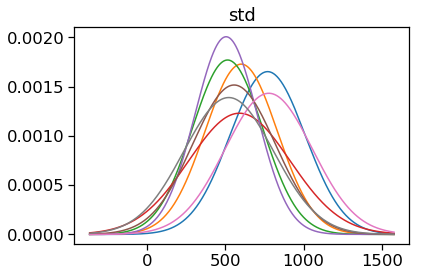

In [26]:
top_genres =small_tracks['track', 'genre_top'].unique() 

spec_feats = ['kurtosis', 'max', 'mean', 'median', 'min', 'skew', 'std']
for f in spec_feats:
    means = []
    std = []
    for g in top_genres:
        g_subset = small_tracks['track', 'genre_top'] == g
        g_tracks = small_tracks[g_subset]
        
        spec = features['spectral_centroid', f, '01'][g_tracks.index.values]    
        means.append(np.mean(spec))
        std.append(np.std(spec))

    mean_of_means = np.mean(means)
    max_std = np.max(std)
    x_max = mean_of_means-max_std*3
    x_min = mean_of_means+max_std*3
    x_axis = np.arange(x_min, x_max, (x_max-x_min)/1000)
    plt.figure()
    for i in range(len(means)):
        spec_dis= norm.pdf(x_axis,means[i],std[i])
        plt.plot(x_axis, spec_dis)
    #plt.legend(top_genres)
    plt.title(f)